(5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Any NaNs before scaling? False
Any NaNs after sca

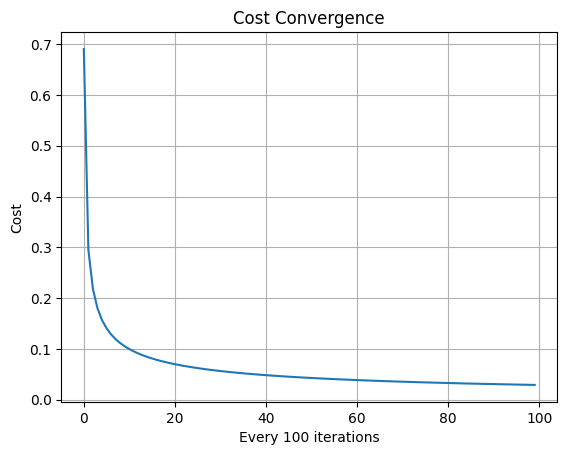

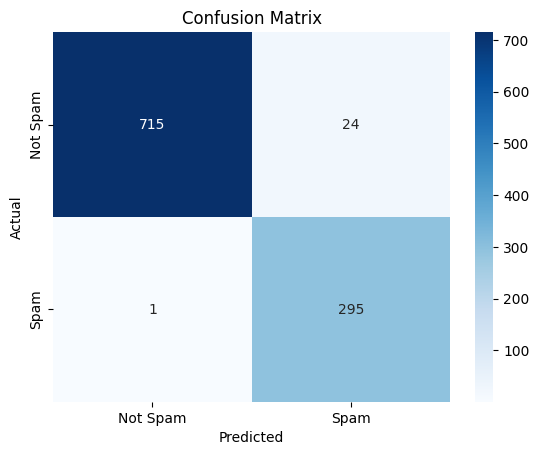

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv("emails.csv")
print(data.shape)
print(data.head())

# Drop rows with NaN values in the target column
data.dropna(subset=[data.columns[-1]], inplace=True)


from sklearn.model_selection import train_test_split
X = data.drop('Email No.', axis=1).iloc[:, :-1]
X = X.loc[:, (X != 0).any(axis=0)]
y = data.iloc[:,-1].values.astype(int) # Ensure target is integer type

X_df = pd.DataFrame(X)
X_df = X_df.loc[:, (X_df != X_df.iloc[0]).any()]  # drop constant columns
X = X_df.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)


from sklearn.preprocessing import StandardScaler
print("Any NaNs before scaling?", np.isnan(X_train).any())

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Any NaNs after scaling?", np.isnan(X_train).any())

print("Mean of X_train:", np.mean(X_train, axis=0))
print("Standard deviation of X_train:", np.std(X_train, axis=0))

m = X_train.shape[0]
n = X_train.shape[1]
print("Number of training examples:", m)
print("Number of features:", n)

def sigmoid(z):
  return 1/(1+np.exp(-z))


from math import log
def compute_cost(X, y, w, b, lambda_=1):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    f_wb = np.clip(f_wb, 1e-15, 1 - 1e-15)  # avoid log(0)

    cost = (-1/m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))

    return cost + reg_cost



def compute_gradient(X, y, w, b, lambda_=1):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    error = f_wb - y
    dj_dw = (1/m) * (np.dot(X.T, error) + lambda_ * w)
    dj_db = (1/m) * np.sum(error)

    return dj_db, dj_dw



def gradient_descent(X_train,y_train,in_w,in_b,lambda_,learning_rate,num_iter):
  cost_history = []
  w = in_w
  b = in_b

  for i in range(num_iter):
    dj_db,dj_dw_i = compute_gradient(X_train,y_train,w,b,lambda_)
    w = w - learning_rate*dj_dw_i
    b = b - learning_rate*dj_db

    if i%100 == 0:
      cost = compute_cost(X_train,y_train,w,b,lambda_)
      cost_history.append(cost)
      print(f"Iteration {i}: Cost = {cost:.8f}")
  return w,b,cost_history


# Initialize weights and bias
np.random.seed(1)
initial_w = np.random.randn(X_train.shape[1]) * 0.01
initial_b = 0.0

# Set hyperparameters
lambda_ = 0.1         # Regularization strength
learning_rate = 0.01
num_iter = 10000



w, b, cost_history = gradient_descent(
    X_train, y_train,
    initial_w, initial_b,
    lambda_,
    learning_rate,
    num_iter
)

def predict (X,w,b,threshold=0.5):
  probs = sigmoid(np.dot(X,w)+b)
  return (probs >= threshold).astype(int)

y_train_pred = predict(X_train,w,b)
y_test_pred = predict(X_test,w,b)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

print("Any NaNs in weights:", np.isnan(w).any())
print("Any NaNs in predictions:", np.isnan(y_train_pred).any())



import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Every 100 iterations")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.grid(True)
plt.show()


import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Reduce to 2D
# pca = PCA(n_components=2)
# X_train_2D = pca.fit_transform(X_train)

# # Fit the model again on reduced data
# w_2D, b_2D, _ = gradient_descent(X_train_2D, y_train, initial_w[:2], initial_b, lambda_, learning_rate, num_iter)

# # Plot decision boundary
# def plot_decision_boundary(X, y, w, b):
#     x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
#     y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                          np.linspace(y_min, y_max, 100))
#     Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
#     plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
#     plt.title("Decision Boundary (after PCA)")
#     plt.xlabel("PCA Feature 1")
#     plt.ylabel("PCA Feature 2")
#     plt.grid(True)
#     plt.show()

# plot_decision_boundary(X_train_2D, y_train, w_2D, b_2D)
